## Supervised-learning
### Classification and Regression
### Generalization, Overfitting and Underfitting

In [1]:
#!pip install mglearn

In [2]:
import sys
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import mglearn 
import numpy as np
import scipy as sp
import sklearn
%matplotlib notebook

In [3]:
# гененрируем набор данных forge

In [4]:
X, y = mglearn.datasets.make_forge()

<IPython.core.display.Javascript object>


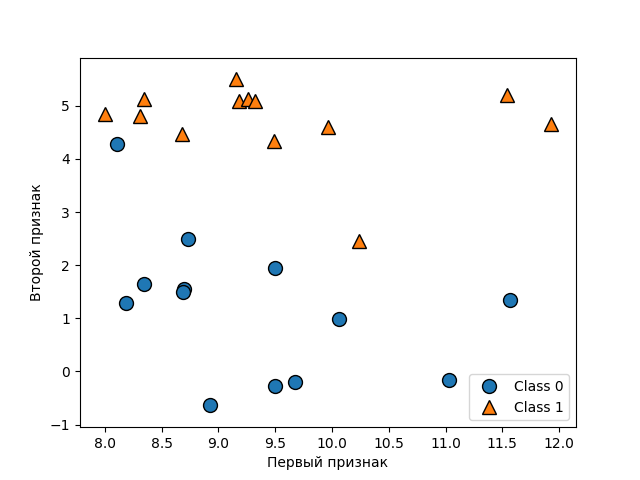

форма массива X: (26, 2)


In [5]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["Class 0", "Class 1"],loc=4)
plt.xlabel("Первый признак")
plt.ylabel("Второй признак")
print("форма массива X: {}".format(X.shape))

<IPython.core.display.Javascript object>


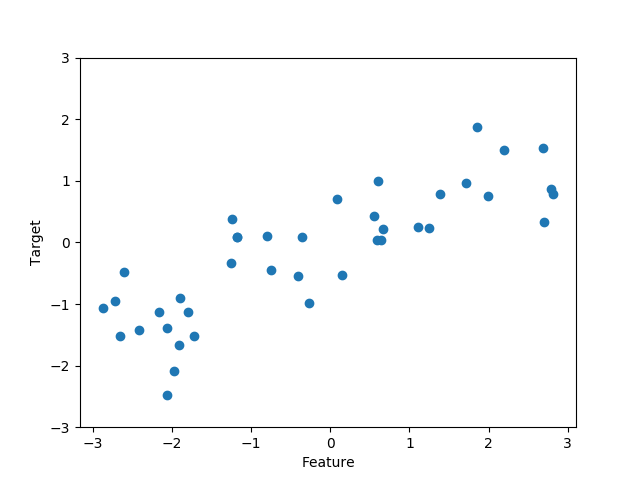

In [6]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [7]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("Ключи cancer(): \n{}".format(cancer.keys()))

Ключи cancer(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [8]:
print("Форма массива для набора cancer: {}".format(cancer.data.shape))

Форма массива для набора cancer: (569, 30)


In [9]:
# 212 - злокачественные, остальные - доброкачественные

In [10]:
print("Количество примеров для каждого класса: \n{}".format({n: v for n, v in zip(cancer.target_names, 
                                                                                  np.bincount(cancer.target))}))

Количество примеров для каждого класса: 
{'malignant': 212, 'benign': 357}


In [11]:
print("Имена признаков: \n{}".format(cancer.feature_names))

Имена признаков: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [12]:
#описание данных cancer
#cancer.DESCR


In [13]:
#### набор данных Boston Housing

In [14]:
from sklearn.datasets import load_boston
boston=load_boston()
print("форма массива data для набора boston:{}".format(boston.data.shape))

форма массива data для набора boston:(506, 13)


In [15]:
# описание набора данных boston
#boston.DESCR

In [16]:
# загрузим набор данных с производными признаками с помощью функции load_extended_boston

In [17]:
X, y = mglearn.datasets.load_extended_boston()
print("Форма массива X: {}".format(X.shape))

Форма массива X: (506, 104)


### Метод k ближайших соседей kNN

<IPython.core.display.Javascript object>


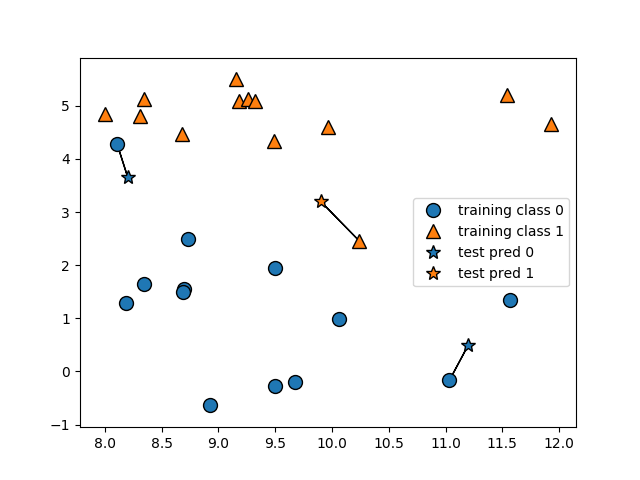

In [18]:
mglearn.plots.plot_knn_classification(n_neighbors=1) #для данных forge, k=1

<IPython.core.display.Javascript object>


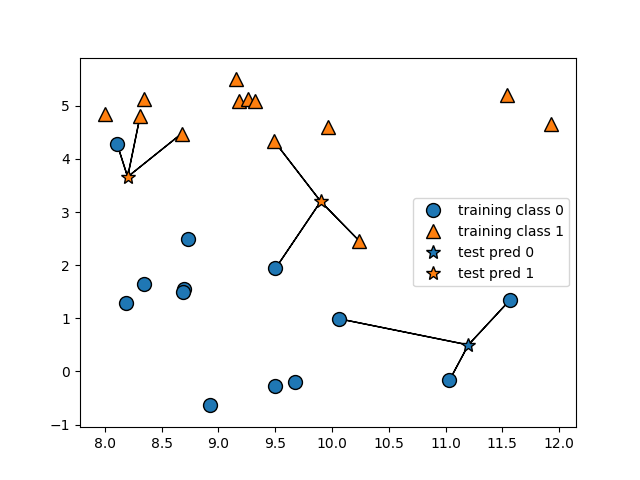

In [19]:
mglearn.plots.plot_knn_classification(n_neighbors=3) #для данных forge, k=3

In [20]:
# прогнозы для точки в углу при k=1 и k=3 отличаются.

In [21]:
# испольхуем теперь для knn библиотеку scikit_klearn

In [22]:
from sklearn.model_selection import train_test_split
X,y=mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=0)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=3)

In [24]:
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [25]:
print("Прогнозы на тестовом наборе: {}".format(clf.predict(X_test)))

Прогнозы на тестовом наборе: [1 0 1 0 1 0 0]


In [26]:
# для оценки обобщающей способности вызовем метод score 

In [27]:
print("правильность на тестовом наборе: {:.2f}".format(clf.score(X_test,y_test)))

правильность на тестовом наборе: 0.86


In [28]:
# визуализация границ принятия решений

<IPython.core.display.Javascript object>


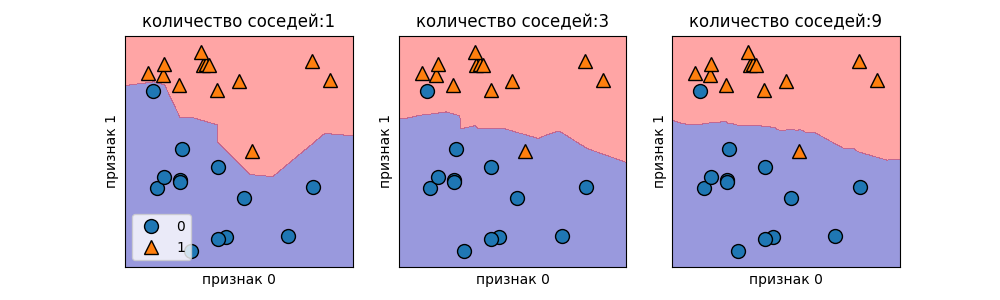

In [29]:
fig, axes =plt.subplots(1,3, figsize=(10,3))
for n_neighbors, ax in zip([1,3,9], axes):
    #создаем объект-классификатор и подгоняем в одной строке
    clf=KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=True, eps=0.5, ax=ax,alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:,1],y,ax=ax)
    ax.set_title("количество соседей:{}".format(n_neighbors))
    ax.set_xlabel("признак 0")
    ax.set_ylabel("признак 1")
    axes[0].legend(loc=3)

### Выясним, существуует ли взаимосвязь между сложностью модели и обобщающей способностью с помощью набора Breast Cancer

In [30]:
# разобъем данные наобучающие и тестовые

<IPython.core.display.Javascript object>


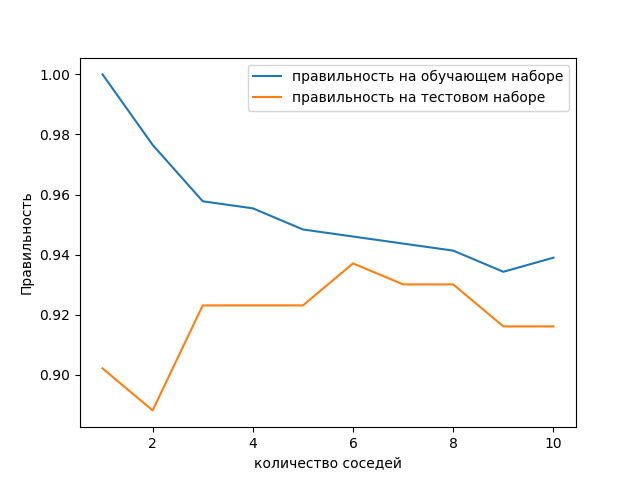

In [31]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
X_train, X_test, y_train, y_test=train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy=[]
test_accuracy=[]
#пробуем k от 1 до 10
neighbors_settings=range(1,11)
for n_neighbors in neighbors_settings:
    # строим модель
    clf=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # записываем правильность на обучающем наборе
    training_accuracy.append(clf.score(X_train,y_train))
    # записываем правильность на тестовом наборе
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="правильность на обучающем наборе") 
plt.plot(neighbors_settings, test_accuracy, label="правильность на тестовом наборе")
plt.ylabel("Правильность")
plt.xlabel("количество соседей")
plt.legend()

### Регрессия k ближайших соседей

In [32]:
# воспользуемся набором данных wave

<IPython.core.display.Javascript object>


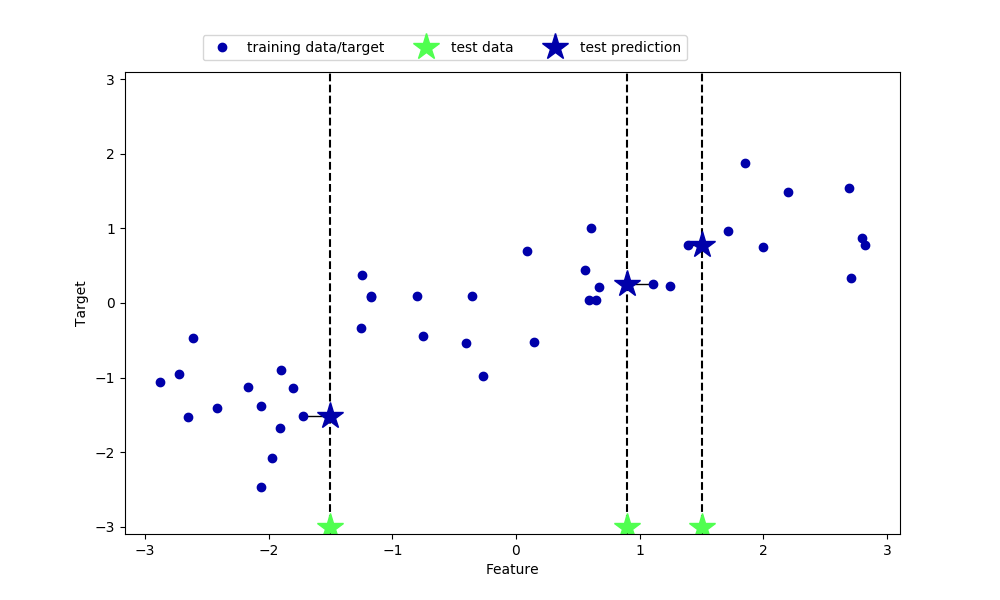

In [33]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

In [34]:
# при использовании нескольких ближайших соседей прогнозом становится среднее значение соответствующих соседей

<IPython.core.display.Javascript object>


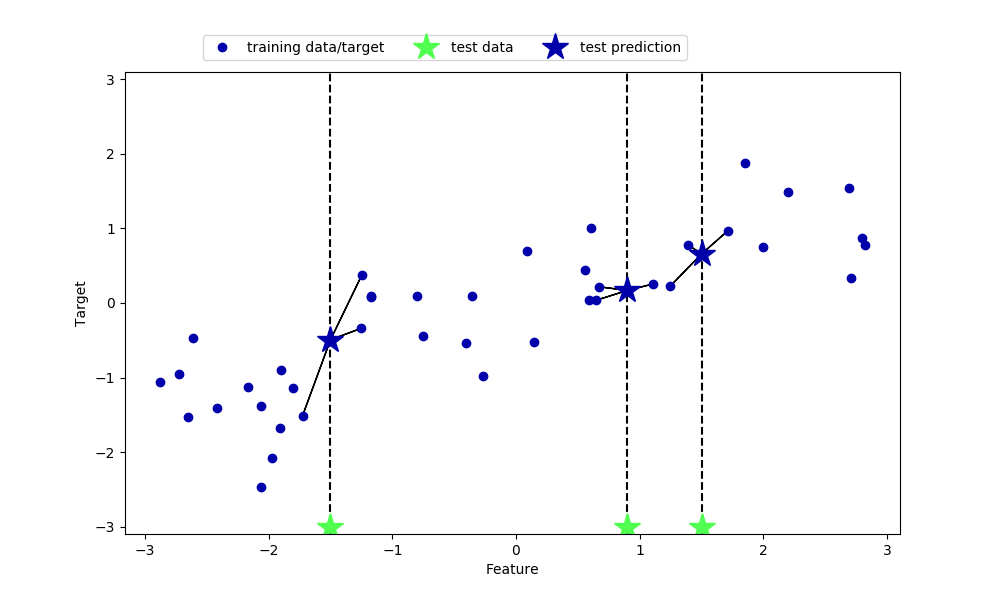

In [35]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

Алгоритм регрессии k ближайших соседей реализован в классе KNeighborsClassifier

In [36]:
from sklearn.neighbors import KNeighborsRegressor
X,y=mglearn.datasets.make_wave(n_samples=40)
# разбиваем набор данных wave на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
# создаем экземпляр модели и устанавливаем количество соседей равным 3
reg=KNeighborsRegressor(n_neighbors=3)
# подгоняем модель с использованием обучающих данніх и обучающих ответов
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

Получим прогнозы для тестового набора

In [37]:
print("Прогнозы для тестового набора: \n{}".format(reg.predict(X_test)))

Прогнозы для тестового набора: 
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


оценим качество модели методом $score$, который для регрессионных моделей возвращает значение $R^2$ - коэффициент детерминации

In [38]:
print("R^2 на тестовом наборе: {:.2f}".format(reg.score(X_test, y_test)))

R^2 на тестовом наборе: 0.83


Анализ модели KNeighborsRegressor

<IPython.core.display.Javascript object>


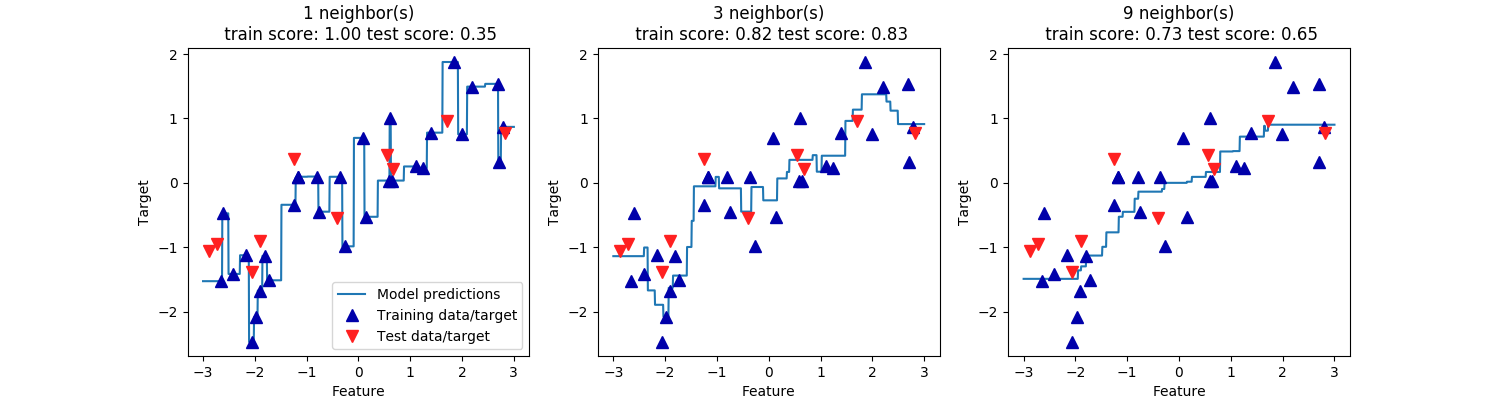

In [39]:
fig, axes=plt.subplots(1,3,figsize=(15,4))
#создаем 1000 точек данных равномерно распределенных между -3 и 3
line=np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9], axes):
    # получаем прогнозы используя 1,3,9 соседей
    reg=KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")

### Линейная регрессия

w[0]: 0.393906  b: -0.031804


<IPython.core.display.Javascript object>


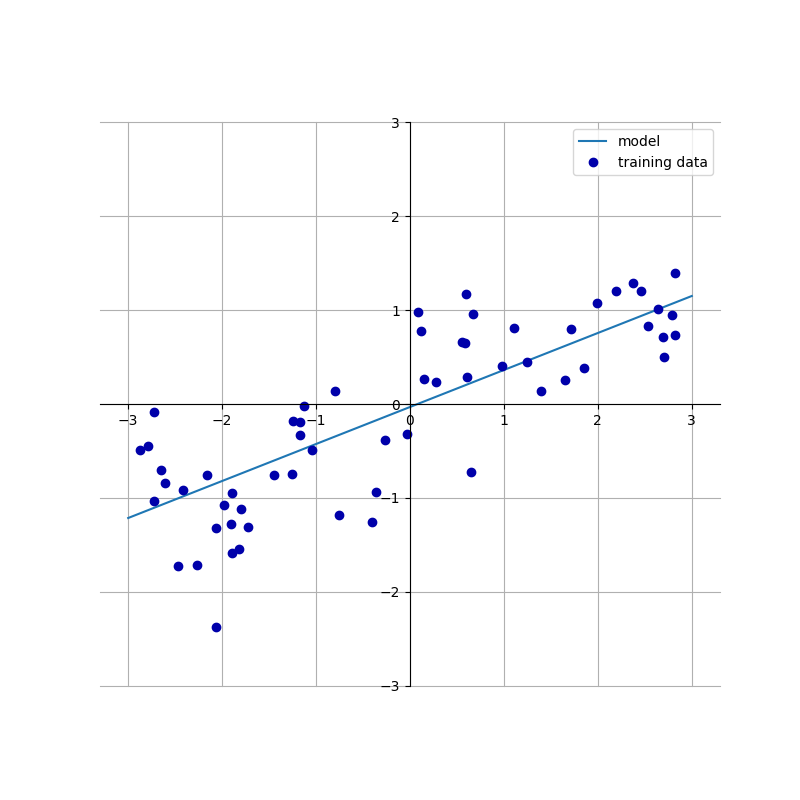

In [40]:
mglearn.plots.plot_linear_regression_wave()

In [41]:
from sklearn.linear_model import LinearRegression
X,y=mglearn.datasets.make_wave(n_samples=60)
X_train,X_test, y_train, y_test=train_test_split(X,y,random_state=42)
lr=LinearRegression().fit(X_train,y_train)

In [42]:
print("lr_coef_:{}".format(lr.coef_))
print("lr.intercept_:{}".format(lr.intercept_))

lr_coef_:[ 0.39390555]
lr.intercept_:-0.03180434302675973


In [43]:
# посмотрим правильность модели

In [44]:
print("Правильность на обучающем наборе:{:.2f}".format(lr.score(X_train,y_train)))
print("Правильность на тестовм наборе:{:.2f}".format(lr.score(X_test,y_test)))

Правильность на обучающем наборе:0.67
Правильность на тестовм наборе:0.66


In [45]:
### изучим работу линейной регрессии на наборе Boston Housing

In [46]:
X,y=mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test=train_test_split(X,y, random_state=0)
lr=LinearRegression().fit(X_train,y_train)

In [47]:
print("Правильность на обучающем наборе:{:.2f}".format(lr.score(X_train,y_train)))
print("Правильность на тестовм наборе:{:.2f}".format(lr.score(X_test,y_test)))

Правильность на обучающем наборе:0.95
Правильность на тестовм наборе:0.61


### Гребневая регрессия (ридж-регрессия)-ridge regression

In [48]:
#все коєффициенты в модели должны быть как можно ближе к 0. Это ограничение является примером регуляризации. 
#В гребневой регрессии используется L2 регуляризация

In [49]:
from sklearn.linear_model import Ridge
ridge=Ridge().fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(ridge.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(ridge.score(X_test, y_test)))


Правильность на обучающем наборе: 0.89
Правильность на тестовом наборе: 0.75


In [50]:
# компромис между простотой модели и качеством работы на обучающем наборе может быть достигнут при помощи параметра alpha 
#(alpha=1 as default)

In [51]:
ridge10=Ridge(alpha=10).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(ridge10.score(X_test, y_test)))

Правильность на обучающем наборе: 0.79
Правильность на тестовом наборе: 0.64


In [52]:
ridge01=Ridge(alpha=0.10).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(ridge01.score(X_test, y_test)))

Правильность на обучающем наборе: 0.93
Правильность на тестовом наборе: 0.77


<IPython.core.display.Javascript object>


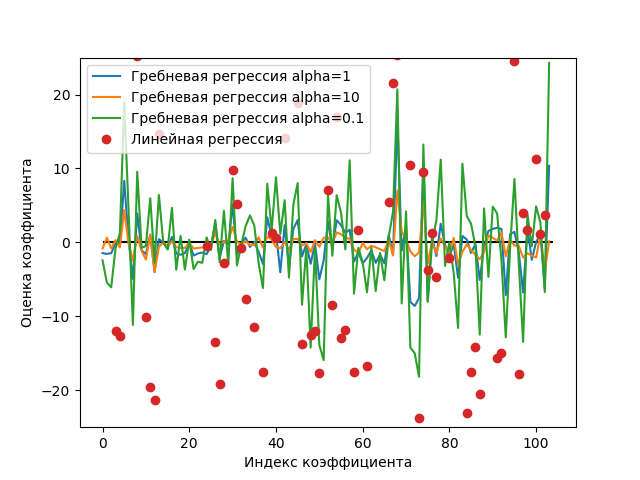

In [53]:
plt.plot(ridge.coef_,label="Гребневая регрессия alpha=1")
plt.plot(ridge10.coef_,label="Гребневая регрессия alpha=10")
plt.plot(ridge01.coef_,label="Гребневая регрессия alpha=0.1")
plt.plot(lr.coef_,'o', label="Линейная регрессия")
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

In [54]:
# зависимость качества модели от объема данных

<IPython.core.display.Javascript object>


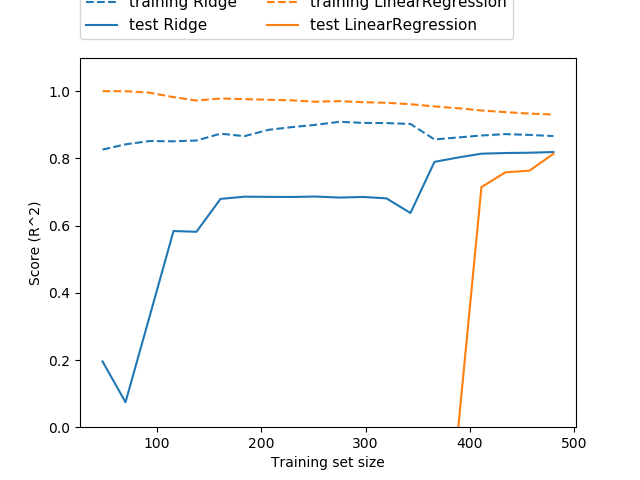

In [55]:
mglearn.plots.plot_ridge_n_samples()

In [56]:
### Lasso регрессия с L1 - регуляризацией, по умолчанию альфа=1

In [57]:
from sklearn.linear_model import Lasso
lasso=Lasso().fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(lasso.score(X_train,y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lasso.score(X_test,y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso.coef_!=0)))

Правильность на обучающем наборе: 0.29
Правильность на тестовом наборе: 0.21
Количество использованных признаков: 4


In [58]:
# Снизим альфа, чтобы избавиться от недообучения, при этом увеличим число итераций max_iter

In [59]:
lasso001=Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(lasso001.score(X_train,y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lasso001.score(X_test,y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso001.coef_!=0)))

Правильность на обучающем наборе: 0.90
Правильность на тестовом наборе: 0.77
Количество использованных признаков: 33


### Линейные модели для классификации

<IPython.core.display.Javascript object>


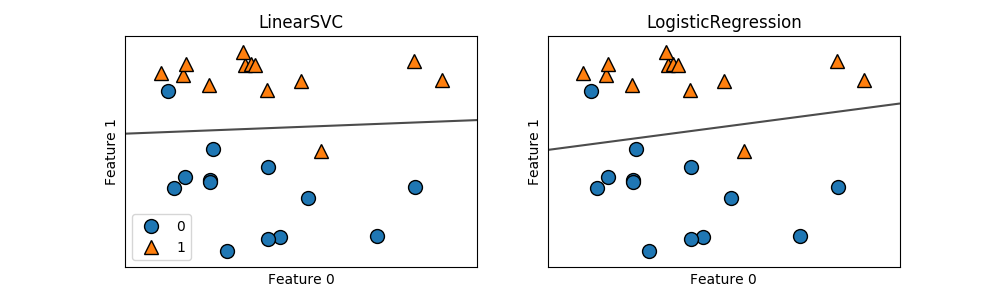

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()    
                  

In [61]:
# параметр, определяющий степень регуляризации, называется С. Более высокие значения соответствуют меньшей регуляризации

In [62]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg=LogisticRegression().fit(X_train, y_train)
print("Правильность на обучающем наборе:{:.3f}".format(logreg.score(X_train, y_train)))
print("Правильность на тестовом наборе:{:.3f}".format(logreg.score(X_test, y_test)))


Правильность на обучающем наборе:0.955
Правильность на тестовом наборе:0.958


дообучим модель, увеличив параметр С

In [63]:
logreg100=LogisticRegression(C=100).fit(X_train, y_train)
print("Правильность на обучающем наборе:{:.3f}".format(logreg100.score(X_train, y_train)))
print("Правильность на тестовом наборе:{:.3f}".format(logreg100.score(X_test, y_test)))


Правильность на обучающем наборе:0.972
Правильность на тестовом наборе:0.965


In [64]:
logreg01=LogisticRegression(C=0.01).fit(X_train, y_train)
print("Правильность на обучающем наборе:{:.3f}".format(logreg01.score(X_train, y_train)))
print("Правильность на тестовом наборе:{:.3f}".format(logreg01.score(X_test, y_test)))

Правильность на обучающем наборе:0.934
Правильность на тестовом наборе:0.930


<IPython.core.display.Javascript object>


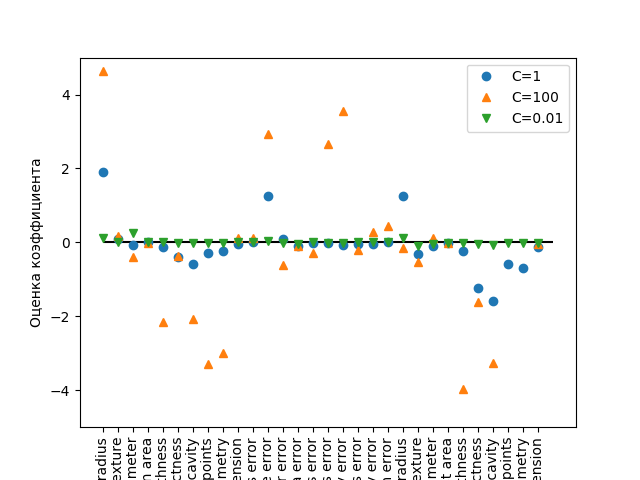

In [65]:
plt.plot(logreg.coef_.T,'o',label="C=1")
plt.plot(logreg100.coef_.T,'^',label="C=100")
plt.plot(logreg01.coef_.T,'v',label="C=0.01")
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names, rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.legend()

In [66]:
# в пердыдущем примере использовалась регуляризация L2. Чтобы получить более интерпретабельную модель, 
#воспользуемся регуляризацией L1

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92


<IPython.core.display.Javascript object>


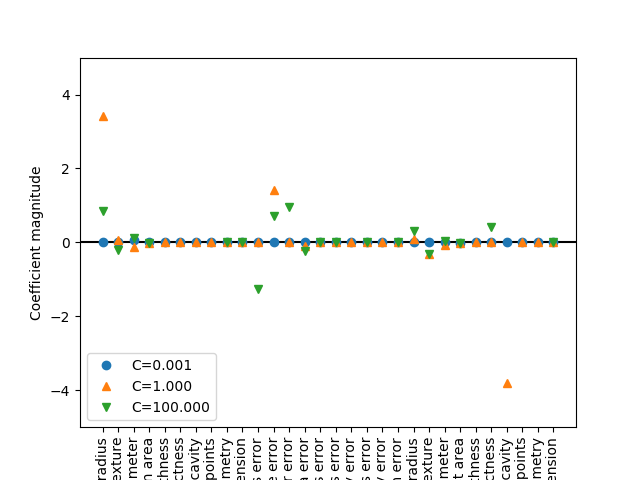

Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


In [71]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

### Мультиклассовая классификация

In [72]:
### подход "один против остальных" - "one-vs-rest"

<IPython.core.display.Javascript object>


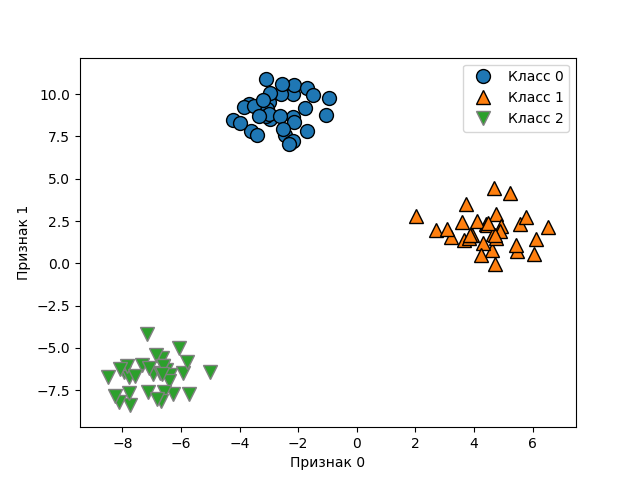

In [75]:
from sklearn.datasets import make_blobs
X, y =make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")
plt.legend(["Класс 0", "Класс 1", "Класс 2"])

обучим классификатор LinearSVC на этом наборе данных

In [76]:
linear_svm=LinearSVC().fit(X, y)
print("Форма коэффициента:", linear_svm.coef_.shape)
print("Форма константы:", linear_svm.intercept_.shape)

Форма коэффициента: (3, 2)
Форма константы: (3,)


визуализируем границы принятия решений

<IPython.core.display.Javascript object>


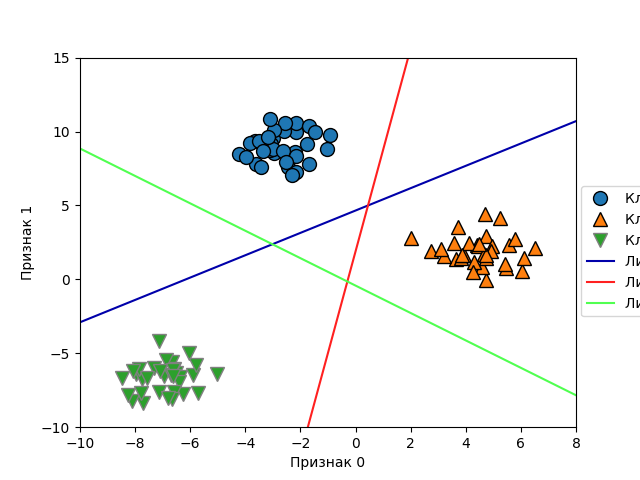

In [78]:
mglearn.discrete_scatter(X[:,0], X[:,1],y)
line=np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, 
                                   mglearn.cm3.colors):
    plt.plot(line,-(line*coef[0]+intercept)/coef[1], c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")
plt.legend(['Класс 0', 'Класс 1', 'Класс 2', 'Линия класса 0', 'Линия класса 1',
           'Линия класса 2'], loc=(1.01, 0.3))


<IPython.core.display.Javascript object>


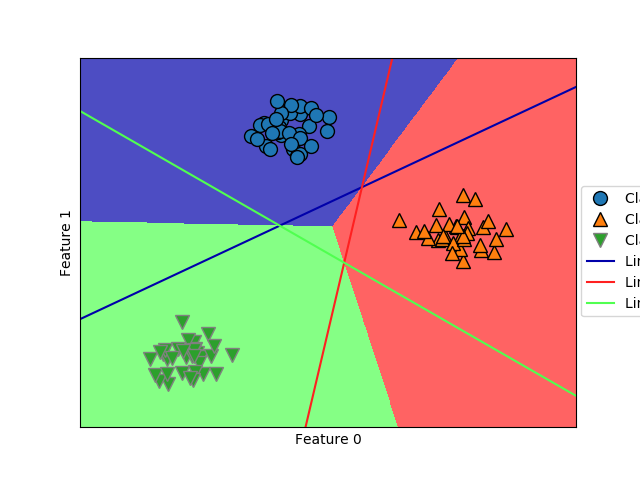

In [79]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")